In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('train.csv')
X1 = df.loc[:, ['GrLivArea','YearBuilt']]
y1 = df['SalePrice']
X1 = X1.apply(np.log)
y1 = y1.apply(np.log)
X1 = X1.values
y1 = y1.values

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

# 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

In [3]:
def _linear_hypothesis(X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    # 配列化
    X = np.array(X)
    
    # １の列の追加
    X = np.insert(X, 0, 1, axis=1)
    
    n = X.shape[1]
    
    # Xの列数分のランダムの重み作成
    w = np.random.rand(n)

    yp = X @ w.T
    
    return yp, w, X

In [4]:
yp, w1, X1 = _linear_hypothesis(X1_train)

# 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

In [5]:
def _gradient_descent( X, y, w, yp):
    """
    説明を記述
    -------------------
    X:配列
    y:正解値
    w: _linear_hypothesisで求めた重み
    yp: _linear_hypothesisで求めた予測値
    
    """
    # yを配列にする
    y = np.array(y)
    
    # 誤差求める関数
    def error(yp , y):
        yd = yp - y
        return yd

    #正解との誤差
    yd = error(yp, y)
    
    # パラメータ
    alpha = 0.00001
    
    #  学習回数
    epoch = 1000
    
    M = X.shape[0]
    
    # 勾配降下法
    for k in range(epoch):
        w = w - alpha* (X.T @ yd) / M
    return w

In [6]:
W = _gradient_descent(X1, y1_train, w1, yp)

In [7]:
W

array([0.08856416, 0.73652155, 0.98693649])

# 【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。

仮定関数 hθ(x)の出力が推定結果です。

In [8]:
def predict(X, w):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    # 配列化
    X = np.array(X)
    
    # Xの列に１の値を追加
    X = np.insert(X, 0, 1, axis=1)
    
    y = X @ w
    
    return y

In [9]:
y_pred = predict(X1_test, W)

In [10]:
y_pred

array([13.12560039, 13.07534041, 12.99884215, 13.0102667 , 12.8587042 ,
       12.86328679, 13.14518514, 12.68178257, 12.94422672, 12.98920221,
       12.43730813, 12.60569947, 12.68632718, 13.16310754, 13.02837588,
       12.97651378, 12.96307817, 12.84327492, 12.96563877, 13.20071552,
       12.95754506, 12.88259348, 13.02171342, 12.90738304, 12.85755847,
       12.81463075, 13.24300811, 12.87194398, 12.74382968, 12.64658271,
       12.7694186 , 12.70992904, 12.89783276, 12.61095774, 12.97058999,
       13.12382708, 12.86010237, 13.05412119, 12.85328853, 12.9551061 ,
       12.58144112, 13.54079261, 12.75753226, 12.75753226, 13.07108345,
       13.15141339, 12.97673399, 13.24935179, 13.11525764, 13.24694571,
       12.66751518, 12.98348636, 13.18022542, 12.76601108, 12.86353718,
       12.6886368 , 13.07350773, 13.07342759, 12.95818694, 12.97773682,
       12.67244686, 13.16433526, 12.49703847, 13.07018117, 12.78491069,
       13.07941572, 13.00715999, 12.92733609, 13.14048038, 13.22

# 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。

平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。


$$
MSE = \ \displaystyle\frac{1}{n} \sum_{i=0}^{n-1} (y_i – \hat{y_i})^{2}
$$

In [11]:
def MSE(y, y_pred):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    
    len_y = len(y_pred)
    
    yd = y_pred - y
    mse = sum(yd**2) / len_y
    return mse

In [12]:
MSE(y1_test,y_pred)

0.8610074295654322

# 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

In [13]:
def cost_func(y, y_pred):
    """
    目的関数を求める関数
    ------------------------------
    parameter
    
    y_pred: yの予測値
    y: 正解値
    """
    y = np.array(y)
    m = len(y_pred)
    j = np.zeros(m)
    for i in range(m):
        j [i] = (1/2*m)* np.sum(np.square(y_pred - y))
    return j

# 最終的なCLASS

In [19]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self,num_iter, alpha, bias=None, verbose=None):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        self.iter = num_iter
        self.alpha = alpha
        self.bias = bias
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
            
        """
        y = y.values
        y_val = y_val.values
        
        X = X.values
        X_val = X_val.values
        
        
        if  not self.bias:
            X = np.insert(X, 0, 1, axis=1)
            X_val = np.insert(X_val, 0, 1, axis=1)

        n = X.shape[1]
        self.w = np.zeros(n,)
        print(self.w)
        
        for i in range(self.iter):
            # 予測関数の呼び出し
            y_pred1 = self._linear_hypothesis(X)
            #y_pred2 = self._linear_hypothesis(X_val)

            error1 = y_pred1 - y
            #error2 = y_pred2 - y_val

            # 最急降下法で学習
            self._gradient_descent1(X, error1, i)

            if self.verbose:
                print("loss: ", self.loss[i])
            
        if any(y_val):
            n = X.shape[1]
            self.w = np.zeros(n,)
            for i in range(self.iter):
                y_pred2 = self._linear_hypothesis(X_val)
                error2 = y_pred2 - y_val
                self._gradient_descent2(X_val, error2, i)

                #学習過程の表示
                if self.verbose:
                    print("val_loss: ", self.val_loss[i])

    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        y_pred = np.dot(X, self.w)

        return y_pred
    
    def _gradient_descent1(self, X, error, i):
        """
        説明を記述
        """
        m = len(X)
        self.w = self.w - self.alpha * (1/m) * (X.T @ error)
        self.loss[i] = (1/2*m)* np.sum(np.square(error))

    def _gradient_descent2(self, X, error, i):
        """
        説明を記述
        """
        m = len(X)
        self.w = self.w - self.alpha * (1/m) * (X.T @ error)
        self.val_loss[i] = (1/2*m)* np.sum(np.square(error))

        
    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        X = X.values
        if  not self.bias:
            X = np.insert(X, 0, 1, axis=1)
        y_pred = np.dot(X, self.w) 
        return y_pred


# 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#　データ作成
df = pd.read_csv('train.csv')
X2 = df.loc[:, ['GrLivArea','YearBuilt']]
y2 = df['SalePrice']
X2 = X2.apply(np.log)
y2 = y2.apply(np.log)

# priceデータの対数変換
y2 = y2.apply(np.log)

# テストデータとtrainデータの作成
X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, test_size =0.2, random_state=0)

In [21]:
SLR = ScratchLinearRegression(num_iter=100, alpha=0.001, bias=None ,verbose=True)

In [22]:
SLR.fit(X2_train, y2_train, X_val= X2_val, y_val= y2_val)
print(SLR.loss)

[0. 0. 0.]
loss:  4217339.21574309
loss:  3329695.4198566927
loss:  2628918.9296311135
loss:  2075670.3243695712
loss:  1638891.9425377666
loss:  1294064.400705684
loss:  1021830.151199485
loss:  806906.8092473629
loss:  637229.247166375
loss:  503272.2954113681
loss:  397516.0290177529
loss:  314023.62227287586
loss:  248108.07368291946
loss:  196069.09220578318
loss:  154985.37435685872
loss:  122550.61126690112
loss:  96944.01963544781
loss:  76728.1285879544
loss:  60768.08450694843
loss:  48167.94386000915
loss:  38220.37770098269
loss:  30366.96441068953
loss:  24166.841634404467
loss:  19271.957632834627
loss:  15407.532733988955
loss:  12356.634052276817
loss:  9947.997547277591
loss:  8046.413790225449
loss:  6545.137724876954
loss:  5359.89633021259
loss:  4424.157793690501
loss:  3685.396621071129
loss:  3102.145017630294
loss:  2641.6650144220043
loss:  2278.11065995933
loss:  1991.0771084386934
loss:  1764.4551548080221
loss:  1585.526913820385
loss:  1444.2518772923358
lo

In [23]:
y_pred = SLR.predict(X2_val)

In [24]:
MSE(y2_val, y_pred)

0.0015078131898317855

In [25]:
lr = LinearRegression()
lr.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
lr_pred = lr.predict(X2_val)

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y2_val, lr_pred)

0.0003095456683099062

# 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。

線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

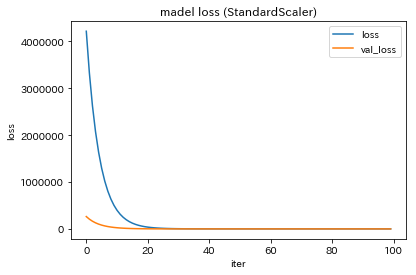

In [28]:
plt.plot(SLR.loss, label="loss")
plt.plot(SLR.val_loss, label="val_loss")
plt.ylabel('loss')
plt.xlabel('iter')
plt.title('madel loss (StandardScaler)')
plt.legend()
plt.show();

## 自作のコードでのテスト

In [29]:
def grad(itera, alpha, w, X, y):
    X = np.insert(X , 0, 1, axis=1)
    print(X)
    m = len(y)
    cost = np.zeros(m)
    for i in range(itera):
        cost[i] = (1/2*m)* np.sum(np.square(np.dot(X, w)-y))
        w = w -alpha* (1/m)* np.dot(X.T, (np.dot(X, w)-y))
    
    return [cost, w]

In [ ]:
df = pd.read_csv('train.csv')
X3 = df.loc[:, ['GrLivArea','YearBuilt']]
y3 = df['SalePrice']
X3 = X3.apply(np.log)
y3 = y3.apply(np.log)
X3 = X3.values
y3 = y3.values


alpha = 0.001
itera = 1000

init_theta = np.zeros(3).reshape(3,)

cost , w = grad(itera, alpha, init_theta, X3, y3)

In [ ]:
plt.plot(cost)
plt.xlabel('Cost')
plt.ylabel('Iteration')
plt.show();